In [1]:
# dev mode
import sys

# add path
sys.path.insert(0, "../../code/src/")

# interactively load the module
%load_ext autoreload
%autoreload 2

In [2]:
from hierarchical_grouping.file_reader import BinaryPolygonFileReader, test_load_module
from hierarchical_grouping.utils import plot_two_polys
import shapely.plotting
import networkx as nx

'''
    Name,            number of sets
    data_auerberg,              796
    data_dottendorf,            871
    data_duisdorf,             2127
    data_endenich,             1060
    data_zentrum,               160
'''
file_path = "../data/data_auerberg"
reader = BinaryPolygonFileReader(file_path)

In [3]:
set_id, polys1, polys2 = reader.read_next_set()
print("set_id: ", set_id)
print("Length polys1: ", len(polys1))
print("Length polys2: ", len(polys2))

set_id:  0
Length polys1:  2
Length polys2:  28


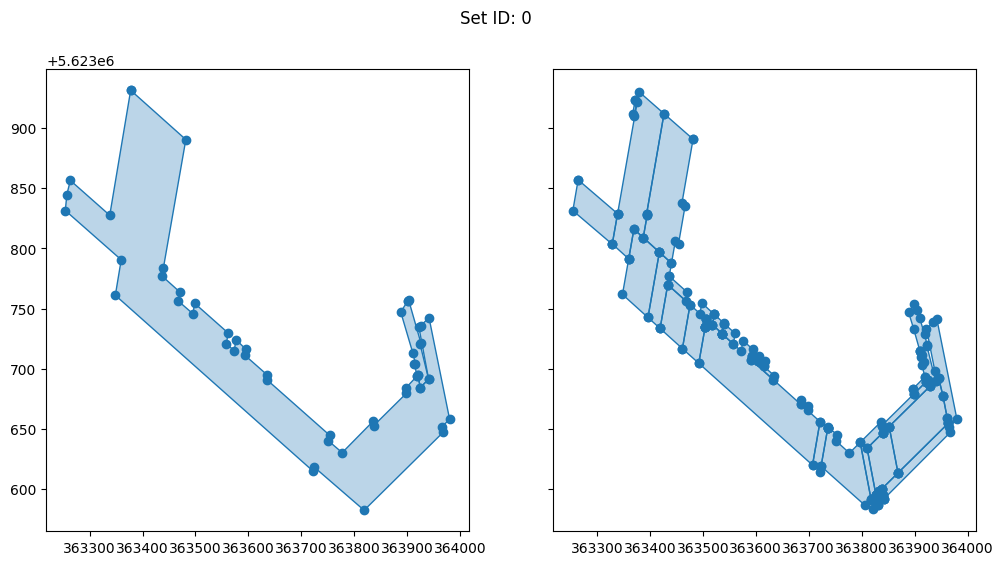

In [4]:
plot_two_polys(polys1, polys2, set_id)

In [5]:
set_id, polys1, polys2 = reader[0] 

# Scatter
# 3, 116, 194
# Line
# 4, 8, 15, 19, 26, 31(small leaves), 38, 43, 47, 48, 66, 76, 104, 105, 131, 141, 142, 173, 187
# Form a circle
# 62, 64, 119, 133, 134, 143, 77, 86, 92, 112, 143, 158, 159, 177
# Complicated 
# 0, 18, 37, 138, 185

# 1. Edges generation/initialization
[networkx](https://networkx.org/documentation/stable/tutorial.html)  
[Polygon](https://shapely.readthedocs.io/en/stable/reference/shapely.Polygon.html)  


## 1.1 Centroid

In [6]:
for poly in polys2:
    print(poly.centroid)
    
# create two graph and add nodes along with their centroid. Would be nice to add centroid
# https://shapely.readthedocs.io/en/stable/reference/shapely.Polygon.html

POINT (363883.34281328286 5623669.041007945)
POINT (363837.23150000017 5623596.930999998)
POINT (363548.9868612812 5623729.070723878)
POINT (363721.57738496515 5623635.296803796)
POINT (363484.2377402465 5623728.840781184)
POINT (363839.51983256725 5623623.7490070425)
POINT (363833.9565550777 5623592.799754818)
POINT (363902.3413909066 5623623.315472894)
POINT (363817.25254194124 5623624.050937839)
POINT (363610.7854999999 5623706.4585)
POINT (363296.82737492654 5623830.086634808)
POINT (363529.35550781986 5623737.100448811)
POINT (363950.8788247123 5623698.921930087)
POINT (363383.21606485575 5623779.235500896)
POINT (363378.3998651718 5623861.35688627)
POINT (363914.5594542426 5623719.602286583)
POINT (363909.3640810271 5623686.279626936)
POINT (363692.0044738754 5623670.048459375)
POINT (363371.4809019105 5623916.358720076)
POINT (363771.4948449502 5623618.201785931)
POINT (363907.63068300736 5623653.249890366)
POINT (363508.21773579624 5623745.513393413)
POINT (363606.4154055675 56

## 1.2 Init Graph andNodes.

In [7]:
import networkx as nx
G = nx.Graph()

In [8]:
c = 0
for poly in polys2:
    node_attributes = {
        "poly": poly,
        # "centroid": poly.centroid,
        # "x": poly.centroid.x,
        # "y": poly.centroid.y,
    }
    node = (c, node_attributes)
    c = c + 1
    G.add_nodes_from([node])

In [9]:
for i in range(len(polys2)):
    print(G.nodes[i])

{'poly': <POLYGON ((363898.664 5623679.115, 363837.801 5623652.706, 363840.285 562364...>}
{'poly': <POLYGON ((363838.668 5623600.472, 363833.663 5623598.296, 363835.795 562359...>}
{'poly': <POLYGON ((363536.74 5623728.852, 363557.715 5623720.585, 363561.159 5623729...>}
{'poly': <POLYGON ((363735.762 5623650.5, 363721.471 5623656.134, 363707.259 5623620....>}
{'poly': <POLYGON ((363504.456 5623734.409, 363504.189 5623734.573, 363506.742 562374...>}
{'poly': <POLYGON ((363840.285 5623646.98, 363810.329 5623634.002, 363827.041 5623595...>}
{'poly': <POLYGON ((363833.663 5623598.296, 363827.38 5623595.564, 363830.967 5623587...>}
{'poly': <POLYGON ((363868.721 5623613.537, 363838.668 5623600.472, 363840.8 5623595....>}
{'poly': <POLYGON ((363827.041 5623595.442, 363810.329 5623634.002, 363840.285 562364...>}
{'poly': <POLYGON ((363604.692 5623706.21, 363615.074 5623702.123, 363616.879 5623706...>}
{'poly': <POLYGON ((363264.639 5623856.832, 363254.65 5623831.283, 363329.016 5623803...>}

In [10]:
G.nodes.data()

NodeDataView({0: {'poly': <POLYGON ((363898.664 5623679.115, 363837.801 5623652.706, 363840.285 562364...>}, 1: {'poly': <POLYGON ((363838.668 5623600.472, 363833.663 5623598.296, 363835.795 562359...>}, 2: {'poly': <POLYGON ((363536.74 5623728.852, 363557.715 5623720.585, 363561.159 5623729...>}, 3: {'poly': <POLYGON ((363735.762 5623650.5, 363721.471 5623656.134, 363707.259 5623620....>}, 4: {'poly': <POLYGON ((363504.456 5623734.409, 363504.189 5623734.573, 363506.742 562374...>}, 5: {'poly': <POLYGON ((363840.285 5623646.98, 363810.329 5623634.002, 363827.041 5623595...>}, 6: {'poly': <POLYGON ((363833.663 5623598.296, 363827.38 5623595.564, 363830.967 5623587...>}, 7: {'poly': <POLYGON ((363868.721 5623613.537, 363838.668 5623600.472, 363840.8 5623595....>}, 8: {'poly': <POLYGON ((363827.041 5623595.442, 363810.329 5623634.002, 363840.285 562364...>}, 9: {'poly': <POLYGON ((363604.692 5623706.21, 363615.074 5623702.123, 363616.879 5623706...>}, 10: {'poly': <POLYGON ((363264.639 5

# 1.3 Edges gen based on distance only.

In [11]:
for i in range(4):
    j = i + 1
    for j in range(j, 4):
        print(i, j)
    # print(G.nodes[i])
    # https://www.geeksforgeeks.org/kruskals-minimum-spanning-tree-algorithm-greedy-algo-2/
    # https://www.geeksforgeeks.org/what-is-minimum-spanning-tree-mst/

0 1
0 2
0 3
1 2
1 3
2 3


In [12]:
for i in range(len(polys1)):
    j = i + 1
    for j in range(j, len(polys1)):
        dist = G.nodes[i]['poly'].distance(G.nodes[j]['poly'])
        dist_centroid = G.nodes[i]['poly'].centroid.distance(G.nodes[j]['poly'].centroid)
        # print('i', G.nodes[i]['poly'].centroid)
        # print('j', G.nodes[j]['poly'].centroid)
        print(i, j, dist_centroid)
        # G.add_edge(i, j, weight= )
    # print(G.nodes[i])
# sqrt((363425.4165-363435.3019)**2 + ( 5624825.2918-5624834.6101)**2)

0 1 85.5926776004543


In [13]:
for i in range(len(polys2)):
    j = i + 1
    for j in range(j, len(polys2)):
        dist = G.nodes[i]['poly'].distance(G.nodes[j]['poly'])
        dist_centroid = G.nodes[i]['poly'].centroid.distance(G.nodes[j]['poly'].centroid)
        # print('i', G.nodes[i]['poly'].centroid)
        # print('j', G.nodes[j]['poly'].centroid)
        print(i, j, dist_centroid)
        # G.add_edge(i, j, weight= )
    # print(G.nodes[i])
# sqrt((363425.4165-363435.3019)**2 + ( 5624825.2918-5624834.6101)**2)

0 1 85.5926776004543
0 2 339.7020303647153
0 3 165.24746628163788
0 4 403.560246063368
0 5 63.02236892231824
0 6 90.83903994393087
0 7 49.51535627886112
0 8 79.95017432246507
0 9 275.1137178253287
0 10 608.2236869458251
0 11 360.4706644374319
0 12 73.8510822386758
0 13 512.1226325490878
0 14 540.3265474720275
0 15 59.42155812722565
0 16 31.213400322845036
0 17 191.3409916499575
0 18 568.4792582385356
0 19 122.86006069965897
0 20 28.969984642205123
0 21 382.84050138210733
0 22 277.1920260324929
0 23 483.19595096887906
0 24 272.0579002261889
0 25 441.9089631031769
0 26 441.9841377793458
0 27 474.43957414540125
1 2 317.08970083773005
1 3 121.85158688166693
1 4 376.83522234198193
1 5 26.91545964266852
1 6 5.271854605622227
1 7 70.25267470968873
1 8 33.684563135239166
1 9 251.54336439817988
1 10 588.5560028071709
1 11 338.282575580936
1 12 152.70188025889664
1 13 489.24937035950666
1 14 529.5729585715582
1 15 145.00985159529412
1 16 114.83155655682155
1 17 162.59474770986188
1 18 564.763391

# 1.3 MST.